In [2]:
import os
import torch
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from joblib import dump,load
from utils import StepWiseDecay as SWD
import pickle
import random
import time

from scipy import stats

In [3]:
fingerprint = 'morgan'
file_path = 'data/data_temp/default_{}/assay_id'.format(fingerprint)

In [4]:
df = pd.read_csv("../" + file_path + "/assay_id_file.csv".format(fingerprint))

In [5]:
df.loc[df["assay_id"]==688239]

,assay_id,squared_pearson_trn,squared_pearson_tst,assay_length_trn,assay_length_tst,assay_length_total
1485,688239,0.009126,0.00747,65984,21995,87979


In [9]:
df['squared_pearson_trn'].mean()

0.7532119834736101

In [11]:
df['squared_pearson_trn'][0:500].mean()

0.8227381045100001

In [10]:
df['squared_pearson_tst'].mean()

0.43526035111072015

In [ ]:
df['squared_pearson_tst'][0:500].mean()

In [25]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

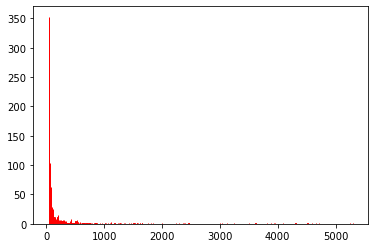

In [26]:
try:
    fig, ax = plt.subplots()
    ax.hist(df['assay_length_trn'], bins=len(df['assay_length_trn']), edgecolor="red")
    # plt.savefig('../data/data_temp/default_{}/plots/expt_pIC50_spread_scaled.jpg'.format(fingerprint),
    #                format='jpg',
    #            )
    plt.show()
except FileNotFoundError:
     print("Designated folder is absent")
except KeyError:
     print("Key Error on 'Dataframe' and/or Series")